In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('/Users/la/Documents/GitHub/MNCH_Data_Analysis/MNCH-Data/MAGARINI MNCH Cleaned data.xlsx', sheet_name="MNCH EValuation Data")

In [5]:
df2 = pd.read_excel('/Users/la/Documents/GitHub/MNCH_Data_Analysis/MNCH-Data/MAGARINI MNCH Cleaned data.xlsx', sheet_name="MNCH Pregnant Women")

In [6]:
df3 = pd.read_excel('/Users/la/Documents/GitHub/MNCH_Data_Analysis/MNCH-Data/MAGARINI MNCH Cleaned data.xlsx', sheet_name="MNCH 0-24 Months")

In [7]:
# Before reading our dataset, we would like to ensure all columns are visible 
# ---
#  
pd.set_option("display.max.columns", None)

In [6]:
df.head()

,start,end,i. Date,ii. Enumerator's name,iii. Beneficiary's resident Sub Location,iv. Beneficiary's resident Village,v. Household size: How many people are in your household?,"vi. Of the above, how many children are;",vi. (a).2-5 years ?,vi. (b). 7 - 24 Months?,vi. (c). 0 - 6 Months?,vii. Category of the Beneficiary,SECTION 1: QUESTIONNAIRE FOR CHILDREN 0 -24 MONTHS,"SECTION 1.A. : SOCIO-DEMOGRAPHICS FOR BREASTFEEDING MOTHER, CAREGIVERS OF CHILDREN 0-24 MONTHS (BELOW 2YEARS OF AGE",A. How old are you?,B. Highest level of school you attended?,C. How old is your youngest child?,"Baby's Gender(1=Boy, 2= Girl).",SECTION 1.B: MATERNAL AND NEW-BORN CARE.,1. Did you seek antenatal care while carrying your most recent pregnancy?,"2. If Yes, please tell where you sort services from",3. At what Gestation were you when you went for your 1st ANC visit?,4. How many ANC Visits did you attend during this pregnancy?,"5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs during pregnancy","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Nutrition during pregnancy","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Rest during pregnancy","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Self-care during pregnancy","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Birth preparedness","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Family planning","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs during delivery","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Post-partum danger signs for the mother","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs for the new-born","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Breastfeeding","6. During your last antenatal care visit, before delivering this baby , did someone;","6. During your last antenatal care visit, before delivering this baby , did someone;/Check your blood pressure","6. During your last antenatal care visit, before delivering this baby , did someone;/Perform an abdominal examination","6. During your last antenatal care visit, before delivering this baby , did someone;/Listen to the baby’s heartbeat","6. During your last antenatal care visit, before delivering this baby , did someone;/Ask about your medical history","6. During your last antenatal care visit, before delivering this baby , did someone;/Take a urine sample","6. During your last antenatal care visit, before delivering this baby , did someone;/Give you advice on what to do if you have a problem","6. During your last antenatal care visit, before delivering this baby , did someone;/Give an injection(s) for tetanus","6. During your last antenatal care visit, before delivering this baby , did someone;/Give you malaria medicine","6. During your last antenatal care visit, before delivering this baby , did someone;/Ask you to take / conduct a syphilis test","6. During your last antenatal care visit, before delivering this baby , did someone;/Ask you to take / conduct an HIV test",7. What were the reasons that you did not see someone for antenatal care?,7. What were the reasons that you did not see someone for ant

In [7]:
# # Separating numerical and categorical variables
# categorical = df.select_dtypes("object")
# print(categorical.columns)

In [8]:
df.columns

Index(['start', 'end', 'i. Date', 'ii. Enumerator's name',
       'iii. Beneficiary's resident Sub Location',
       'iv. Beneficiary's resident Village',
       'v. Household size: How many people are in your household?',
       'vi. Of the above, how many children are;', 'vi. (a).2-5 years ?',
       'vi. (b). 7 -  24 Months?',
       ...
       'Date', '_id', '_uuid', '_submission_time', '_validation_status',
       '_notes', '_status', '_submitted_by', '_tags', '_index'],
      dtype='object', length=263)

Vizualization

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt

# sns.barplot(x = df['v. Household size: How many people are in your household?'],y = df['vi. (a).2-5 years ?'],data = df)
# fig = plt.figure(figsize = (15, 10))


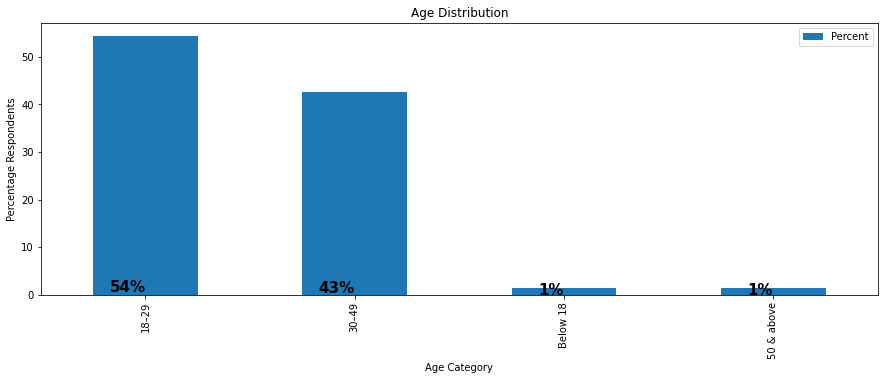

In [10]:
new_df = df['A. How old are you?'].value_counts(normalize =True)

new_df = new_df.mul(100).rename('Percent').reset_index()


# ax = new_df.plot.bar(rot=0, figsize=(8, 7))
ax = new_df.plot.bar(x = 'index', y = 'Percent', figsize = (15,5))
# set the title
plt.title('Age Distribution')
plt.text(0.5,0.5, "", weight = "bold")
ax.set_xlabel("Age Category")
ax.set_ylabel("Percentage Respondents")

for p in ax.patches:
    width = p.get_width()
    height = (p.get_height()/100)
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='right', weight = "bold", va = 'baseline', size = 15)
    


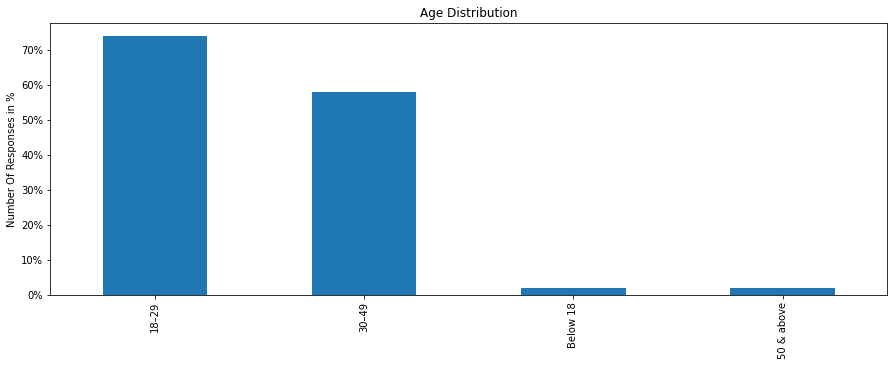

In [11]:

import matplotlib.ticker as mtick

ax = df ['A. How old are you?'].value_counts(sort=True).plot(kind='bar', figsize=(15, 5), title = "Age Distribution")
plt.ylabel('Number Of Responses in %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

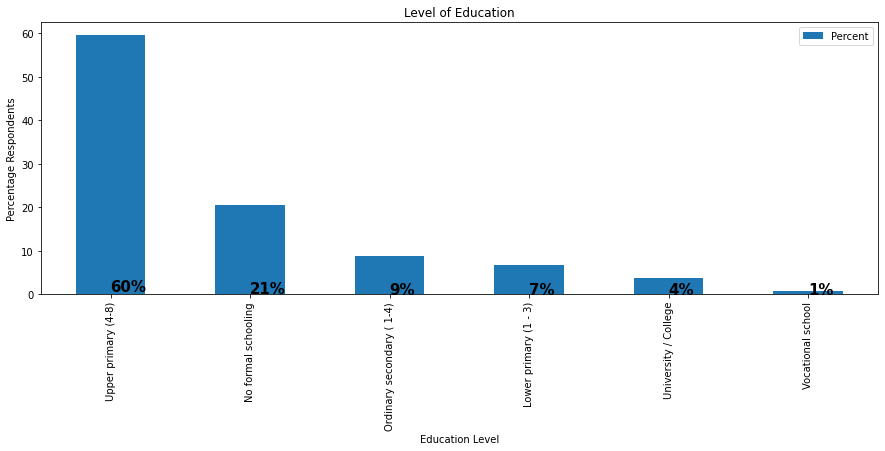

In [12]:
school_df = df['B. Highest level of school you attended?'].value_counts(normalize =True)

school_df = school_df.mul(100).rename('Percent').reset_index()


# ax = school_df.plot.bar(rot=0, figsize=(8, 7))
ax = school_df.plot.bar(x = 'index', y = 'Percent', figsize = (15,5))
# set the title
plt.title('Level of Education')
plt.text(0.5,0.5, "", weight = "bold")
ax.set_xlabel("Education Level")
ax.set_ylabel("Percentage Respondents")

for p in ax.patches:
    width = p.get_width()
    height = (p.get_height()/100)
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='left', weight = "bold", va = 'baseline', size = 15)

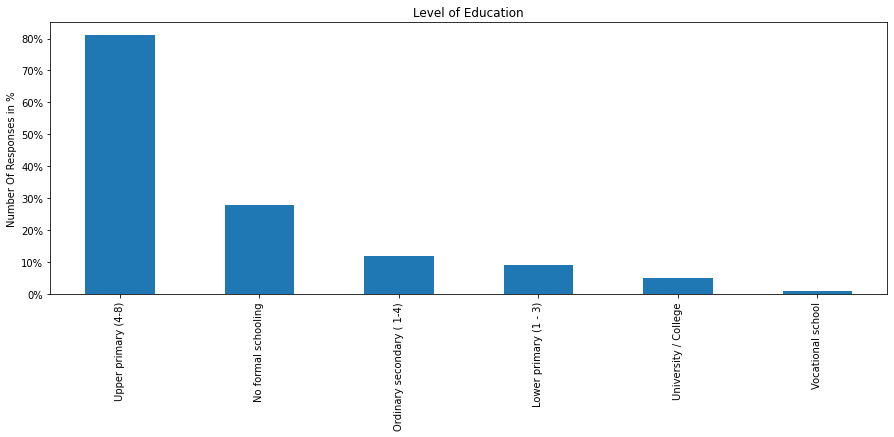

In [13]:
ax = df ['B. Highest level of school you attended?'].value_counts(sort=True).plot(kind='bar', figsize=(15, 5), title = "Level of Education")
plt.ylabel('Number Of Responses in %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [14]:
a = df['vi. (c). 0 - 6 Months?']
b = df['vi. (b). 7 -  24 Months?']
c = df['vi. (a).2-5 years ?']

/var/folders/fx/g8czx7fs49jg83f3f0zm_7_80000gn/T/ipykernel_31349/1136560830.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


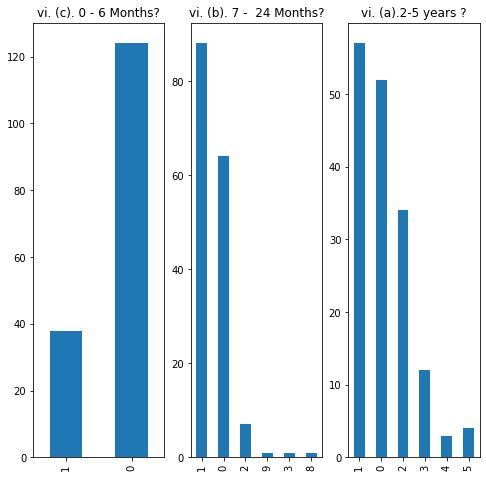

In [15]:
categorical_features = ['vi. (c). 0 - 6 Months?', 'vi. (b). 7 -  24 Months?', 'vi. (a).2-5 years ?']
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts(sort=False).plot(kind = "bar", ax=ax[i], figsize=(8, 8)).set_title(categorical_feature)
fig.show()

/Users/la/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vi. (a).2-5 years ?', ylabel='count'>

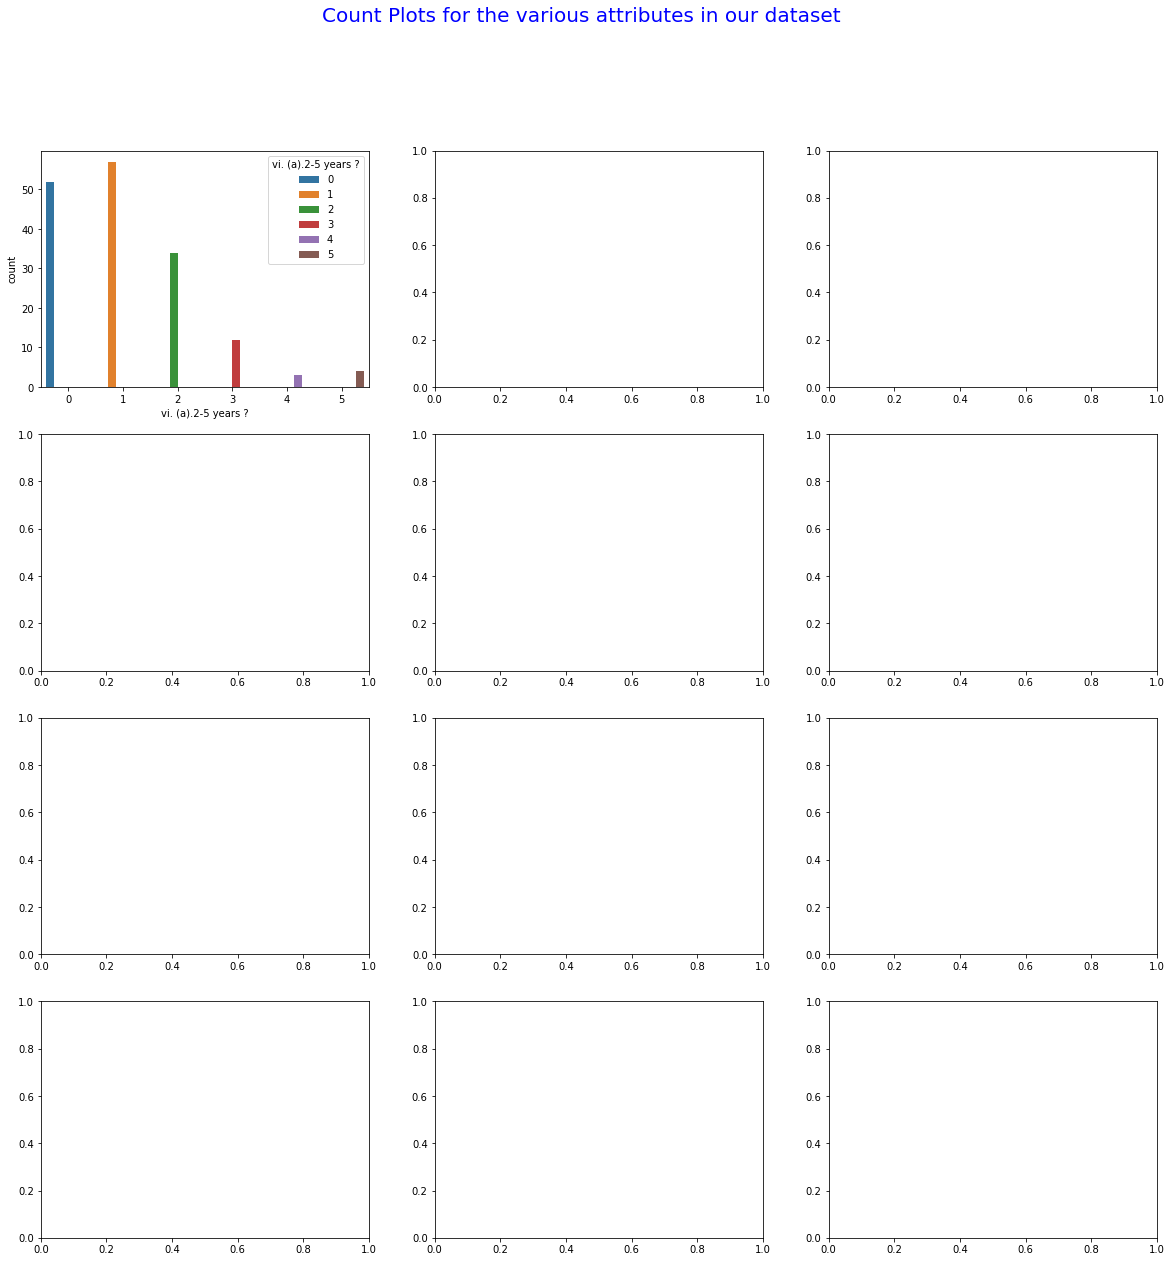

In [16]:
# Plotting Count Plots for the various attributes in our dataset
fig,axes = plt.subplots(4,3, figsize=(20,20))
fig.suptitle('Count Plots for the various attributes in our dataset', fontsize = 20, color='blue')
sns.countplot('vi. (a).2-5 years ?', data = df, hue='vi. (a).2-5 years ?', ax = axes[0,0])

In [17]:
# df['SECTION 2 B: KNOWLEDGE AND ATTITUDE TOWARDS BREASTFEEDING IN EXPECTANT MOTHERS'].value_counts(sort=True).plot(kind='bar', figsize=(8, 5), title = "Level of Education Attended")


In [18]:
df2.head()

,start,end,i. Date,ii. Enumerator's name,iii. Beneficiary's resident Sub Location,iv. Beneficiary's resident Village,v. Household size: How many people are in your household?,"vi. Of the above, how many children are;",vi. (a).2-5 years ?,vi. (b). 7 - 24 Months?,vi. (c). 0 - 6 Months?,vii. Category of the Beneficiary,A. Age: How old are you,B. Educational level: what is the highest level of school you attended?,C. PREGNANCY: Is this your first pregnancy?,"D. If it is not the first pregnancy, How many children do you have?",1. Have you ever breastfed a child?,2. What is the first food a new-born baby should receive?,3. Have you ever heard of exclusive breastfeeding?,4. What does exclusive breastfeeding mean?,5. How long should the baby be fed with breast milk only?,6. Why do you think breast milk is the only food Recommended for infants up to six months old?,6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Because breast milk provides all nutrients and liquids a baby needs in its first six months.,6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Because babies cannot digest other foods before they are six months old,6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Other,6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Don’t know,7. From what age should the baby start eating food?,8. For how long should the baby continue to receive complementary breast feeding?,9. How likely are you to breastfeed your baby when you get one?,10. Can you tell me the reason why you are unlikely to breastfeed your baby?,10. Can you tell me the reason why you are unlikely to breastfeed your baby?/Side effects/ health concerns,10. Can you tell me the reason why you are unlikely to breastfeed your baby?/Lack of access/ too far,10. Can you tell me the reason why you are unlikely to breastfeed your baby?/Costs too much,10. Can you tell me the reason why you are unlikely to breastfeed your baby?/preferred method not available,10. Can you tell me the reason why you are unlikely to breastfeed your baby?/Inconvenient to use,10. Can you tell me the reason why you are unlikely to breastfeed your baby?/Interferes with body’s normal process,"10. Can you tell me the reason why you are unlikely to breastfeed your baby?/Others (mother in law, mother, and friends) do not approve",10. Can you tell me the reason why you are unlikely to breastfeed your baby?/Other (specify),Other (specify),11. What is your primary source of water,"Other, Please specify here",12. Do you treat your water in any way to make it safe for drinking?,"13. If yes, what do you usually do to the water to make it safer for drinking?","13. If yes, what do you usually do to the water to make it safer for drinking?/Let it stand and settle/ sedimentation","13. If yes, what do you usually do to the water to make it safer for drinking?/Strain it through cloth","13. If yes, what do you usually do to the water to make it safer for drinking?/Boil","13. If yes, what do you usually do to the water to make it safer for drinking?/Add bleach/ chlorine","13. If yes, what do you usually do to the water to make it safer for drinking?/Water filter (ceramic, sand, composite)","13. If yes, what do you usually do to the water to make it safer for drinking?/solar disinfection","13. If yes, what do you usually do to the water to make it safer for drinking?/Don’t know","13. If yes, what do you usually do to the water to make it safer for drinking?/Other",Others Specify here,14. What kind of toilet facility do members of your household usually use?,14. What kind of toilet facility do members of your household usually use?/Pit latrine,14. What kind of toilet facility do members of your household usually use?/VIP latrine,14. What kind of toilet facility do members of your household usually use?/Flush toilet,14. What kind of toilet facility do m

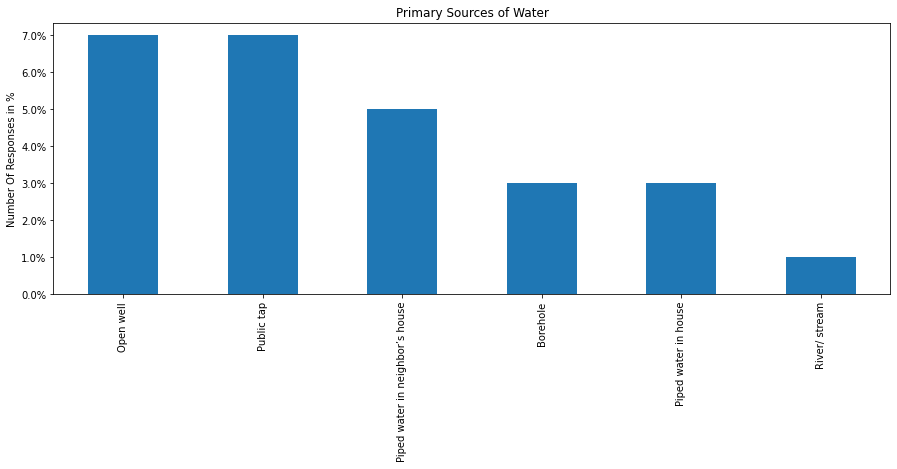

In [19]:
# ax = df2['11. What is your primary source of water'].value_counts(sort=True).plot(kind='bar', figsize=(15, 5), title = "Primary Sources of Water")
ax = df2['11. What is your primary source of water'].value_counts(sort=True).plot(kind='bar', figsize=(15, 5), title = "Primary Sources of Water")
plt.ylabel('Number Of Responses in %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


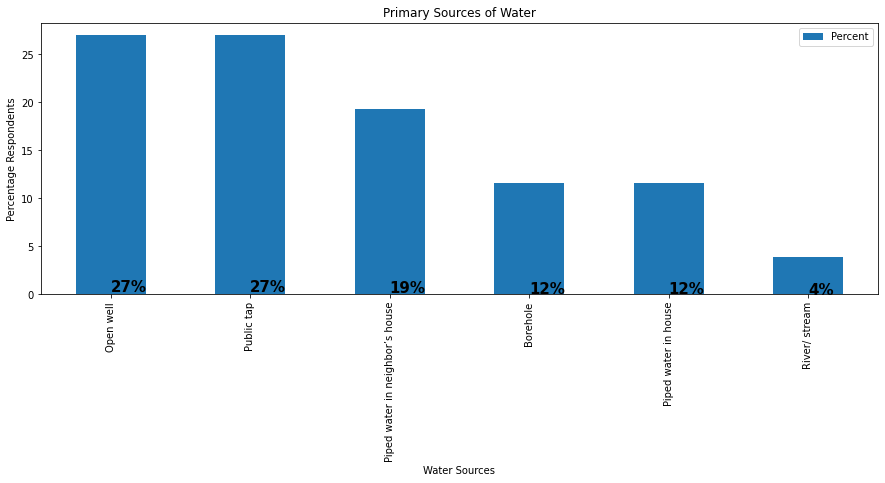

In [20]:
water_df = df2['11. What is your primary source of water'].value_counts(normalize =True)

water_df = water_df.mul(100).rename('Percent').reset_index()


# ax = water_df.plot.bar(rot=0, figsize=(8, 7))
ax = water_df.plot.bar(x = 'index', y = 'Percent', figsize = (15,5))
# set the title
plt.title('Primary Sources of Water')
plt.text(0.5,0.5, "", weight = "bold")
ax.set_xlabel("Water Sources")
ax.set_ylabel("Percentage Respondents")

for p in ax.patches:
    width = p.get_width()
    height = (p.get_height()/100)
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='left', weight = "bold", va = 'baseline', size = 15)

In [21]:
df2_1 = df2[df2['13. If yes, what do you usually do to the water to make it safer for drinking?'] != 99]

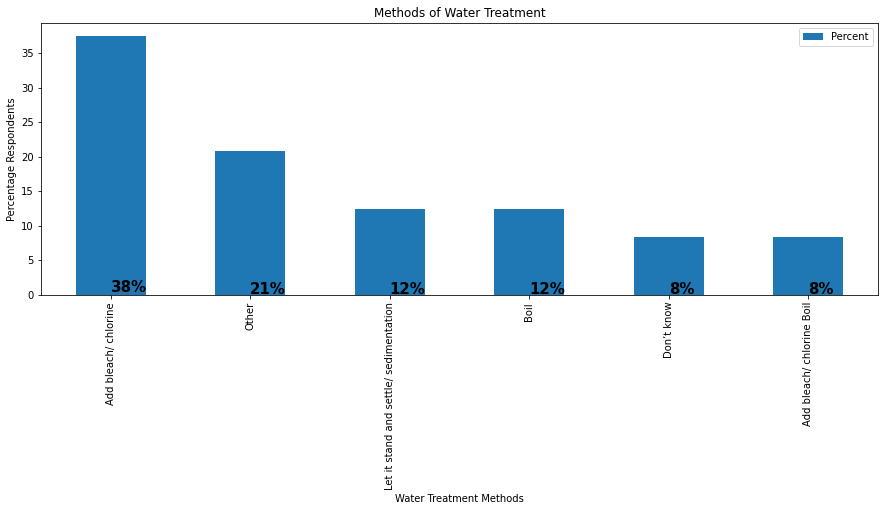

In [22]:
treatment_df = df2_1['13. If yes, what do you usually do to the water to make it safer for drinking?'].value_counts(normalize =True)

treatment_df = treatment_df.mul(100).rename('Percent').reset_index()


# ax = treatment_df.plot.bar(rot=0, figsize=(8, 7))
ax = treatment_df.plot.bar(x = 'index', y = 'Percent', figsize = (15,5))
# set the title
plt.title('Methods of Water Treatment')
plt.text(0.5,0.5, "", weight = "bold")
ax.set_xlabel("Water Treatment Methods")
ax.set_ylabel("Percentage Respondents")

for p in ax.patches:
    width = p.get_width()
    height = (p.get_height()/100)
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='left', weight = "bold", va = 'baseline', size = 15)

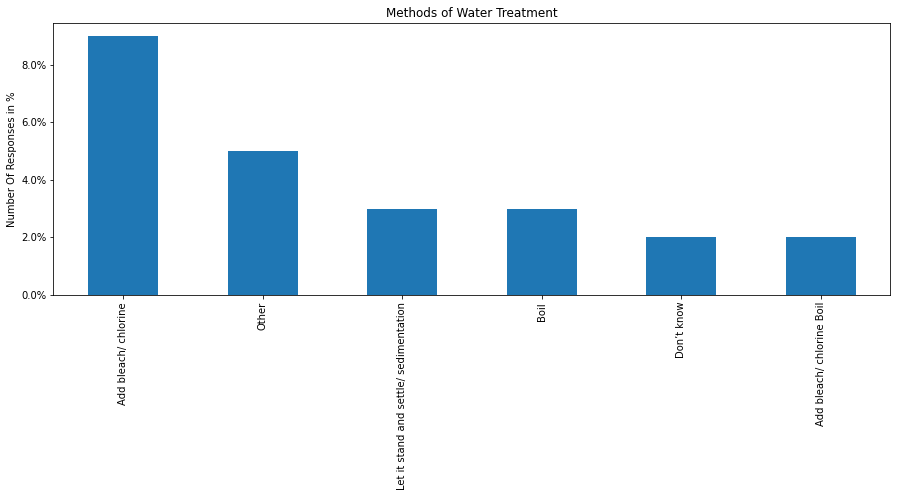

In [23]:


import matplotlib.ticker as mtick

ax = df2_1['13. If yes, what do you usually do to the water to make it safer for drinking?'].value_counts(sort=True).plot(kind='bar', figsize=(15, 5), title = "Methods of Water Treatment")
plt.ylabel('Number Of Responses in %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

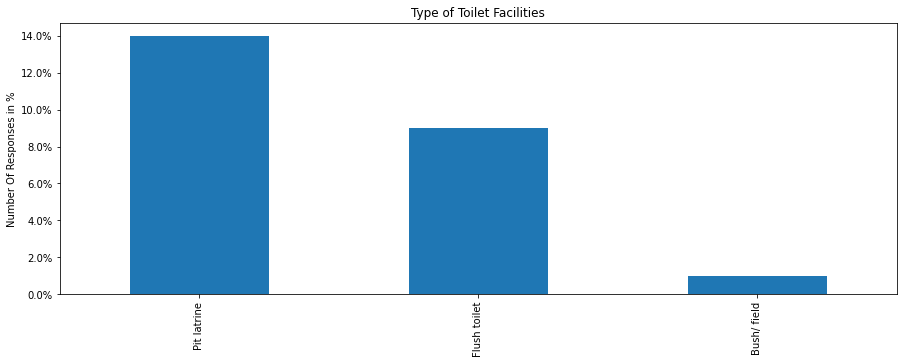

In [24]:

import matplotlib.ticker as mtick

ax = df2_1['14. What kind of toilet facility do members of your household usually use?'].value_counts(sort=True).plot(kind='bar', figsize=(15, 5), title = "Type of Toilet Facilities")
plt.ylabel('Number Of Responses in %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

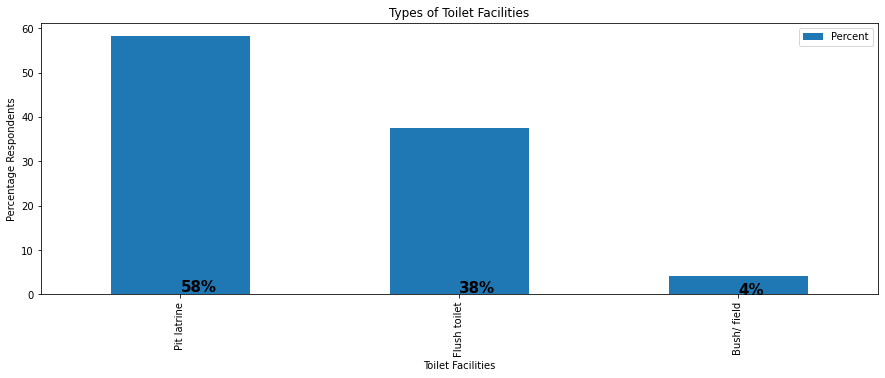

In [25]:
treatment_df = df2_1['14. What kind of toilet facility do members of your household usually use?'].value_counts(normalize =True)

treatment_df = treatment_df.mul(100).rename('Percent').reset_index()


# ax = treatment_df.plot.bar(rot=0, figsize=(8, 7))
ax = treatment_df.plot.bar(x = 'index', y = 'Percent', figsize = (15,5))
# set the title
plt.title('Types of Toilet Facilities')
plt.text(0.5,0.5, "", weight = "bold")
ax.set_xlabel("Toilet Facilities")
ax.set_ylabel("Percentage Respondents")

for p in ax.patches:
    width = p.get_width()
    height = (p.get_height()/100)
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='left', weight = "bold", va = 'baseline', size = 15)

In [26]:
df2_2 = df2[df2['19. If Yes, please tell where you get  services from'] != 99]

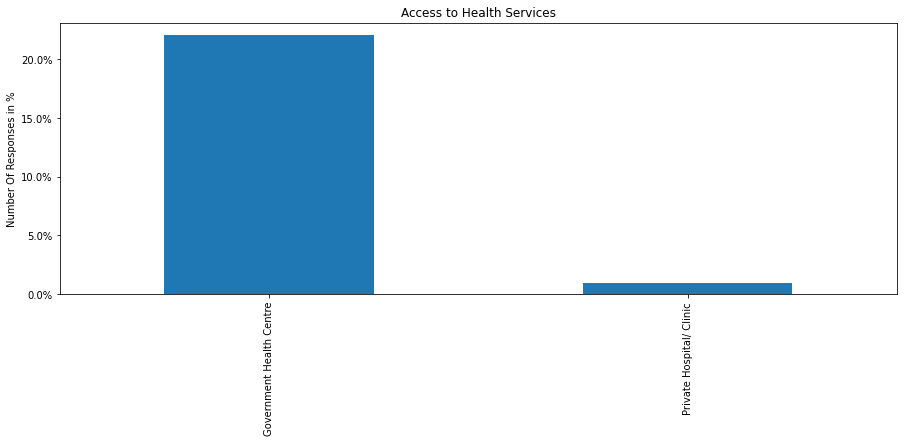

In [27]:

ax = df2_2['19. If Yes, please tell where you get  services from'].value_counts(sort=True).plot(kind='bar', figsize=(15, 5), title = "Access to Health Services")
plt.ylabel('Number Of Responses in %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

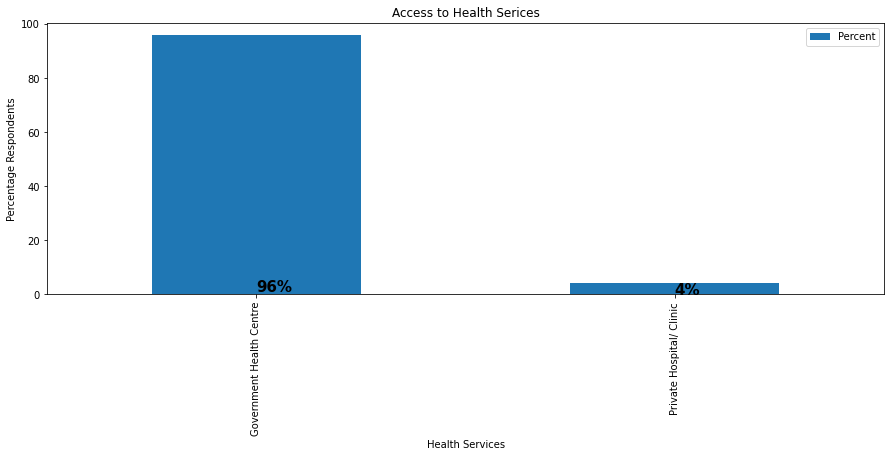

In [28]:
services_df = df2_2['19. If Yes, please tell where you get  services from'].value_counts(normalize =True)

services_df = services_df.mul(100).rename('Percent').reset_index()


# ax = services_df.plot.bar(rot=0, figsize=(8, 7))
ax = services_df.plot.bar(x = 'index', y = 'Percent', figsize = (15,5))
# set the title
plt.title('Access to Health Serices')
plt.text(0.5,0.5, "", weight = "bold")
ax.set_xlabel("Health Services")
ax.set_ylabel("Percentage Respondents")

for p in ax.patches:
    width = p.get_width()
    height = (p.get_height()/100)
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='left', weight = "bold", va = 'baseline', size = 15)

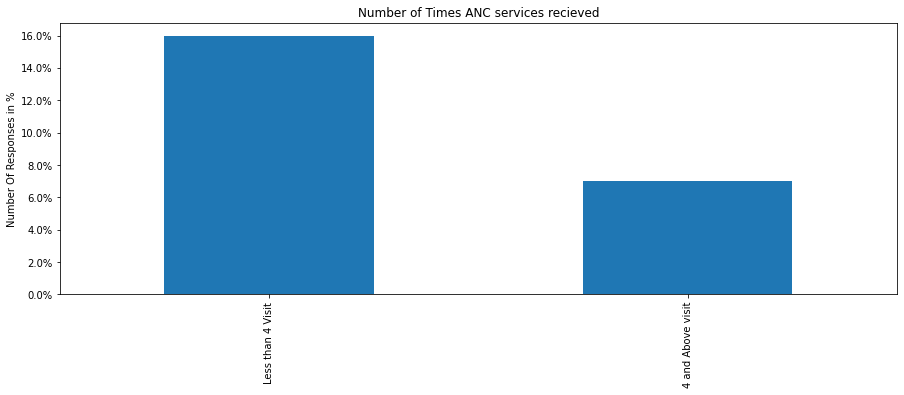

In [29]:
ax = df2_2['21. How many ANC Visits have you attended during this pregnancy?'].value_counts(sort=True).plot(kind='bar', figsize=(15, 5), title = "Number of Times ANC services recieved")
plt.ylabel('Number Of Responses in %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

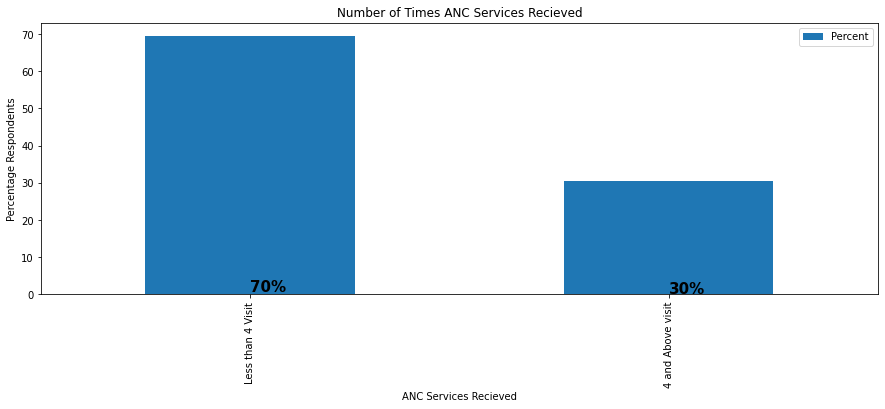

In [30]:
natals_df = df2_2['21. How many ANC Visits have you attended during this pregnancy?'].value_counts(normalize =True)

natals_df = natals_df.mul(100).rename('Percent').reset_index()


# ax = natals_df.plot.bar(rot=0, figsize=(8, 7))
ax = natals_df.plot.bar(x = 'index', y = 'Percent', figsize = (15,5))
# set the title
plt.title('Number of Times ANC Services Recieved')
plt.text(0.5,0.5, "", weight = "bold")
ax.set_xlabel("ANC Services Recieved")
ax.set_ylabel("Percentage Respondents")

for p in ax.patches:
    width = p.get_width()
    height = (p.get_height()/100)
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='left', weight = "bold", va = 'baseline', size = 15)

In [31]:
df2_2['24. During this pregnancy, do you sleep under a treated  mosquito net?'].value_counts()

Yes    23
Name: 24. During this pregnancy, do you sleep under a treated  mosquito net?, dtype: int64

In [32]:
df3.head()

,start,end,i. Date,ii. Enumerator's name,iii. Beneficiary's resident Sub Location,iv. Beneficiary's resident Village,v. Household size: How many people are in your household?,"vi. Of the above, how many children are;",vi. (a).2-5 years ?,vi. (b). 7 - 24 Months?,vi. (c). 0 - 6 Months?,vii. Category of the Beneficiary,A. How old are you?,B. Highest level of school you attended?,C. How old is your youngest child?,"Baby's Gender(1=Boy, 2= Girl).",1. Did you seek antenatal care while carrying your most recent pregnancy?,"2. If Yes, please tell where you sort services from",3. At what Gestation were you when you went for your 1st ANC visit?,4. How many ANC Visits did you attend during this pregnancy?,"5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs during pregnancy","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Nutrition during pregnancy","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Rest during pregnancy","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Self-care during pregnancy","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Birth preparedness","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Family planning","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs during delivery","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Post-partum danger signs for the mother","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs for the new-born","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Breastfeeding","6. During your last antenatal care visit, before delivering this baby , did someone;","6. During your last antenatal care visit, before delivering this baby , did someone;/Check your blood pressure","6. During your last antenatal care visit, before delivering this baby , did someone;/Perform an abdominal examination","6. During your last antenatal care visit, before delivering this baby , did someone;/Listen to the baby’s heartbeat","6. During your last antenatal care visit, before delivering this baby , did someone;/Ask about your medical history","6. During your last antenatal care visit, before delivering this baby , did someone;/Take a urine sample","6. During your last antenatal care visit, before delivering this baby , did someone;/Give you advice on what to do if you have a problem","6. During your last antenatal care visit, before delivering this baby , did someone;/Give an injection(s) for tetanus","6. During your last antenatal care visit, before delivering this baby , did someone;/Give you malaria medicine","6. During your last antenatal care visit, before delivering this baby , did someone;/Ask you to take / conduct a syphilis test","6. During your last antenatal care visit, before delivering this baby , did someone;/Ask you to take / conduct an HIV test",7. What were the reasons that you did not see someone for antenatal care?,7. What were the reasons that you did not see someone for antenatal care?/No health care provider available,7. What were the reasons that you did not see someone for antenatal care?/Could not afford,7. What were the reasons that you did not see someone for antenatal care

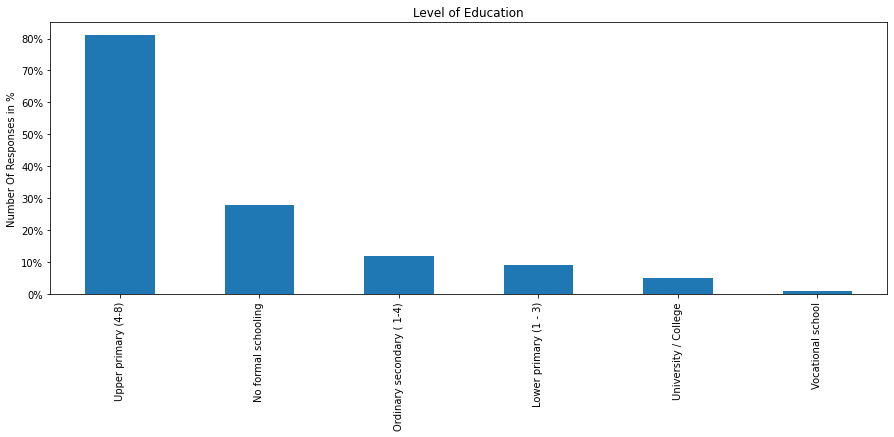

In [33]:
ax = df3['B. Highest level of school you attended?'].value_counts(sort=True).plot(kind='bar', figsize=(15, 5), title = "Level of Education")
plt.ylabel('Number Of Responses in %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


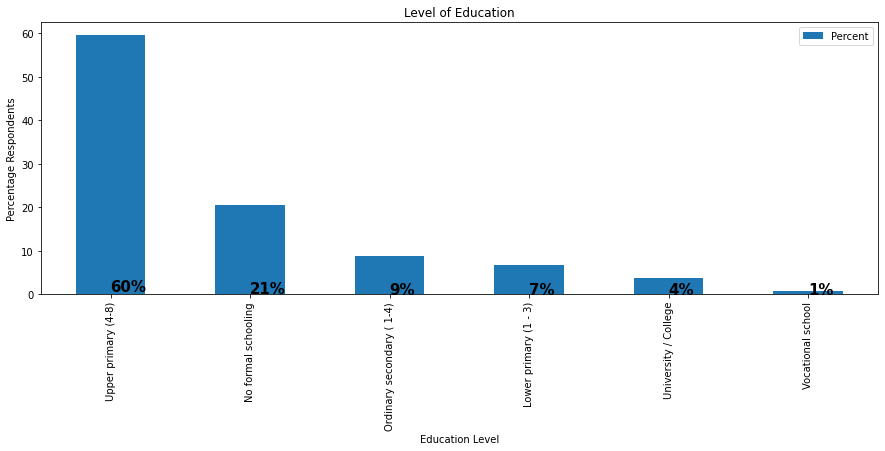

In [34]:
schools1_df = df3['B. Highest level of school you attended?'].value_counts(normalize =True)

schools1_df = schools1_df.mul(100).rename('Percent').reset_index()


# ax = schools1_df.plot.bar(rot=0, figsize=(8, 7))
ax = schools1_df.plot.bar(x = 'index', y = 'Percent', figsize = (15,5))
# set the title
plt.title('Level of Education')
plt.text(0.5,0.5, "", weight = "bold")
ax.set_xlabel("Education Level")
ax.set_ylabel("Percentage Respondents")

for p in ax.patches:
    width = p.get_width()
    height = (p.get_height()/100)
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='left', weight = "bold", va = 'baseline', size = 15)

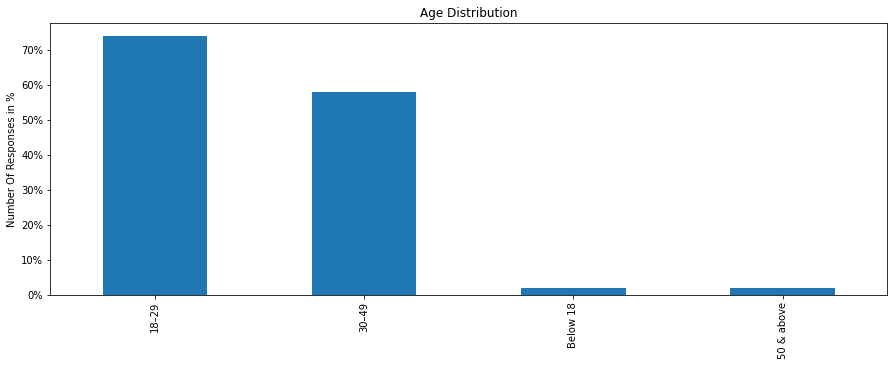

In [35]:


ax = df3['A. How old are you?'].value_counts(sort=True).plot(kind='bar', figsize=(15, 5), title = "Age Distribution")
plt.ylabel('Number Of Responses in %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())

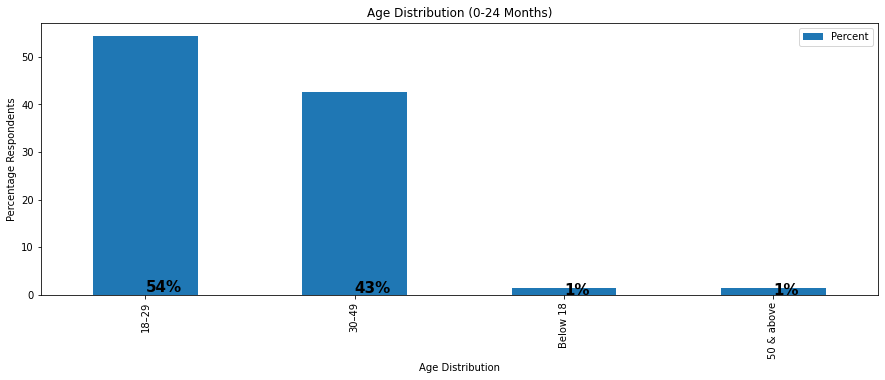

In [36]:
schools1_df = df3['A. How old are you?'].value_counts(normalize =True)

schools1_df = schools1_df.mul(100).rename('Percent').reset_index()


# ax = schools1_df.plot.bar(rot=0, figsize=(8, 7))
ax = schools1_df.plot.bar(x = 'index', y = 'Percent', figsize = (15,5))
# set the title
plt.title('Age Distribution (0-24 Months)')
plt.text(0.5,0.5, "", weight = "bold")
ax.set_xlabel("Age Distribution")
ax.set_ylabel("Percentage Respondents")

for p in ax.patches:
    width = p.get_width()
    height = (p.get_height()/100)
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='left', weight = "bold", va = 'baseline', size = 15)

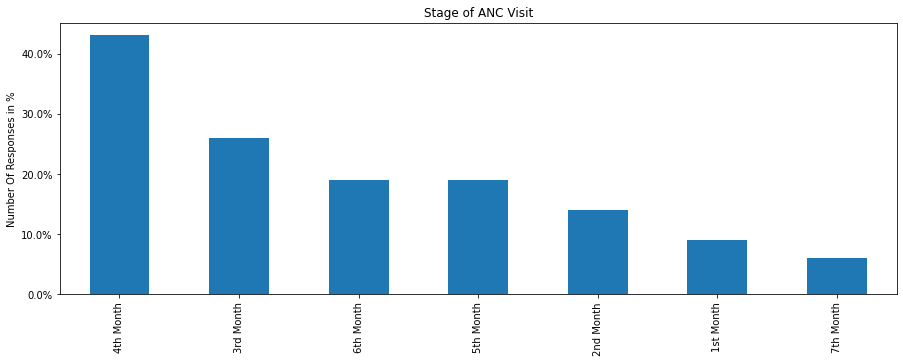

In [37]:


ax = df3['3. At what Gestation were you when you went for your 1st ANC visit?'].value_counts(sort=True).plot(kind='bar', figsize=(15, 5), title = "Stage of ANC Visit")
plt.ylabel('Number Of Responses in %')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


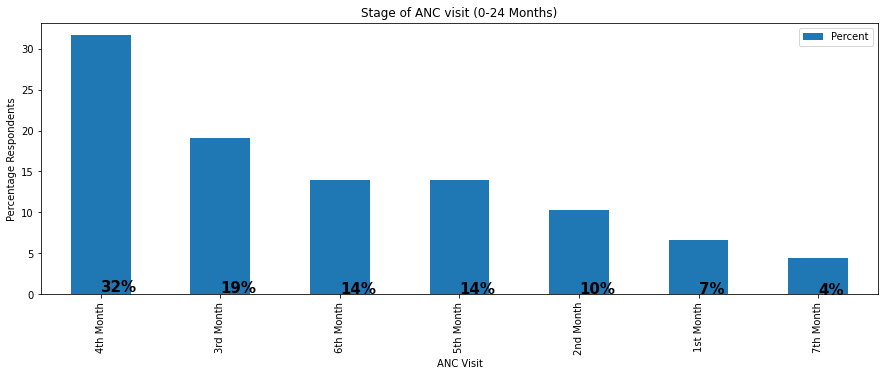

In [38]:
gestation_df = df3['3. At what Gestation were you when you went for your 1st ANC visit?'].value_counts(normalize =True)

gestation_df = gestation_df.mul(100).rename('Percent').reset_index()


# ax = gestation_df.plot.bar(rot=0, figsize=(8, 7))
ax = gestation_df.plot.bar(x = 'index', y = 'Percent', figsize = (15,5))
# set the title
plt.title('Stage of ANC visit (0-24 Months)')
plt.text(0.5,0.5, "", weight = "bold")
ax.set_xlabel("ANC Visit")
ax.set_ylabel("Percentage Respondents")

for p in ax.patches:
    width = p.get_width()
    height = (p.get_height()/100)
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='left', weight = "bold", va = 'baseline', size = 15)

/var/folders/fx/g8czx7fs49jg83f3f0zm_7_80000gn/T/ipykernel_31349/1497327236.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


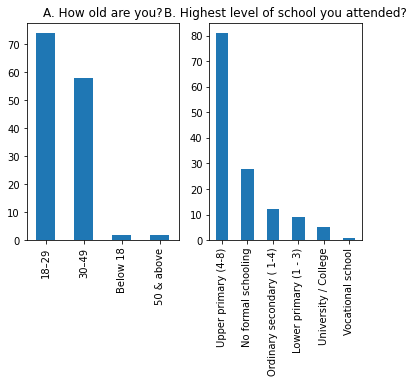

In [39]:
categorical_features = ['A. How old are you?', 'B. Highest level of school you attended?']
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts(sort=True).plot(kind = "bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

In [40]:
age_1_5 = df[(df['v. Household size: How many people are in your household?'] >= 1 )& (df['v. Household size: How many people are in your household?'] <= 5)]
age_6_10 = df[(df['v. Household size: How many people are in your household?'] >= 6) & (df['v. Household size: How many people are in your household?'] <= 10)]
age_11_15 = df[(df['v. Household size: How many people are in your household?'] >= 11) & (df['v. Household size: How many people are in your household?'] <= 16)]
age_16_20 = df[(df['v. Household size: How many people are in your household?'] >= 16) & (df['v. Household size: How many people are in your household?'] <= 20)]
age_21_25 = df[(df['v. Household size: How many people are in your household?'] > 20)]


In [41]:
df_dict = pd.DataFrame({'Number of People: 1-5': [age_1_5['v. Household size: How many people are in your household?'].count()], 'Number of People: 6-10': [age_6_10['v. Household size: How many people are in your household?'].count()], 'Number of People: 11-15': [age_11_15['v. Household size: How many people are in your household?'].count()], 'Number of People: 16-20': [age_16_20['v. Household size: How many people are in your household?'].count()], 'Number of People: 21-25': [age_21_25['v. Household size: How many people are in your household?'].count()]}, index=[0])


In [42]:
df_dict.head()

,Number of People: 1-5,Number of People: 6-10,Number of People: 11-15,Number of People: 16-20,Number of People: 21-25
0,67,79,13,2,1


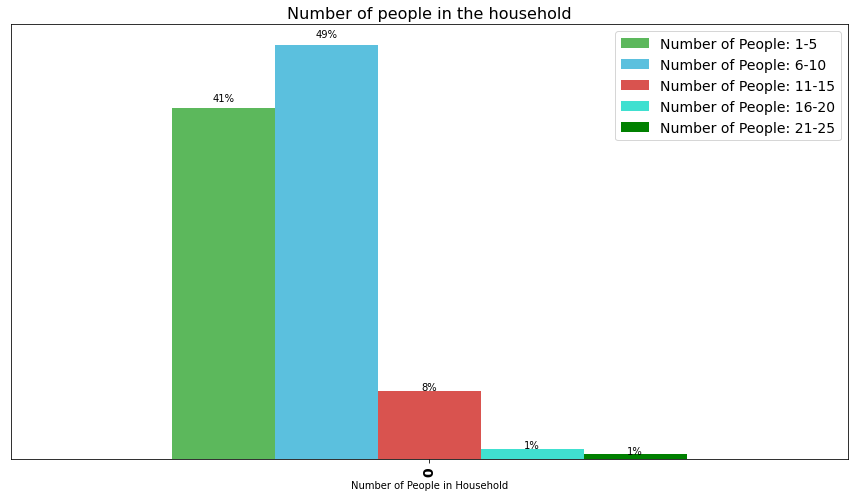

In [43]:
colors_list = ['#5cb85c','#5bc0de','#d9534f','#40E0D0','#008000']

# Normalize result
result_pct = df_dict.div(df_dict.sum(1), axis=0)

ax = result_pct.plot(kind='bar',figsize=(15,8),width = 0.8,color = colors_list,edgecolor=None)
ax.set_xlabel("Number of People in Household")
plt.legend(labels=df_dict.columns,fontsize= 14)
plt.title("Number of people in the household",fontsize= 16)

plt.xticks(fontsize=14, weight = "bold")
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:0.00%}', (x + width/2.00, y + height*1.020), ha='center')


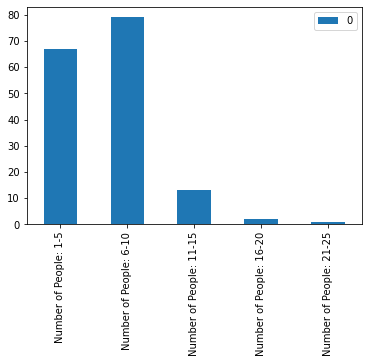

In [44]:
# loop over all columns
for col in df_dict.columns:
    # counting occurences for each value can be done by value_counts()
    val_counts = df_dict[col]

    # calculate the sum of all categories
    total = val_counts.sum()
    # use value count for each category and divide it by the total count of all categories
    # and multiply by 100 to get nice percent values
    df2[col] = val_counts / total * 100

# columns and rows need to be transposed in order to get the result we want  
df_dict.transpose().plot.bar(stacked=True)
plt.show()

Text(0, 0.5, 'Number of People in the Household')

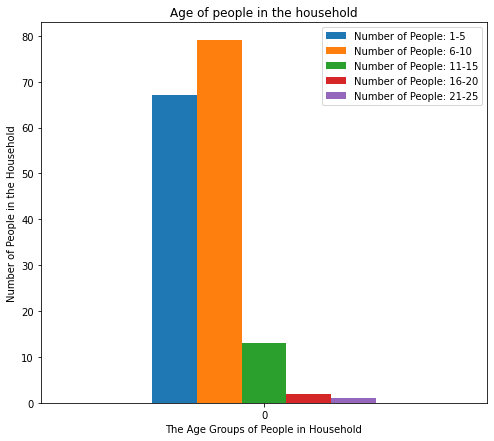

In [45]:
ax = df_dict.plot.bar(rot=0, figsize=(8, 7))
# set the title
plt.title('Age of people in the household')
ax.set_xlabel("The Age Groups of People in Household")
ax.set_ylabel("Number of People in the Household")

In [46]:
age_2_5 = df['vi. (a).2-5 years ?']
age_7_24 = df['vi. (b). 7 -  24 Months?']
age_0_6 = df['vi. (c). 0 - 6 Months?']


In [47]:
df['vi. (a).2-5 years ?'].value_counts()

1    57
0    52
2    34
3    12
5     4
4     3
Name: vi. (a).2-5 years ?, dtype: int64

In [48]:
df['vi. (b). 7 -  24 Months?'].value_counts()

1    88
0    64
2     7
9     1
3     1
8     1
Name: vi. (b). 7 -  24 Months?, dtype: int64

In [49]:
df['vi. (c). 0 - 6 Months?'].value_counts()

0    124
1     38
Name: vi. (c). 0 - 6 Months?, dtype: int64

/var/folders/fx/g8czx7fs49jg83f3f0zm_7_80000gn/T/ipykernel_31349/1126783225.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


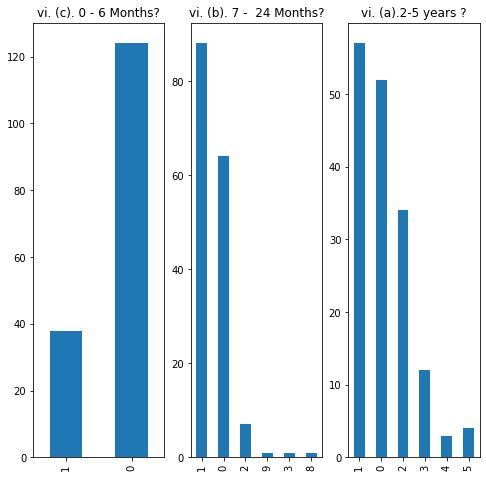

In [50]:
# categorical_features = [a,b,c]
categorical_features = ['vi. (c). 0 - 6 Months?','vi. (b). 7 -  24 Months?','vi. (a).2-5 years ?' ]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts(sort=False).plot(kind = "bar", ax=ax[i], figsize=(8, 8)).set_title(categorical_feature)
fig.show()

In [51]:
age_dict = pd.DataFrame({'2 - 5 years': [age_2_5.count()], '7 - 24 Months': [age_7_24.count()], '0 - 6 Months': [age_0_6.count()]}, index=[0])


In [52]:
age_dict.head()

,2 - 5 years,7 - 24 Months,0 - 6 Months
0,162,162,162


How many are pregnant women

In [8]:
df['vii. Category of the Beneficiary'].value_counts()

Children 0 - 24 Months    136
Pregnant Women             26
Name: vii. Category of the Beneficiary, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Children between 0-24 months and Pregnant Women')

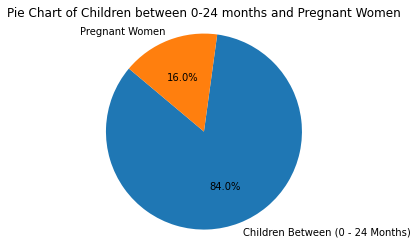

In [9]:
data = df['vii. Category of the Beneficiary'].value_counts()
lab = ['Children Between (0 - 24 Months)', 'Pregnant Women' ]

# Plotting our pie chart
# -------
plt.pie(data, labels = lab, autopct = '%1.1f%%',  startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Children between 0-24 months and Pregnant Women')

In [55]:
df['6. Why do you think breast milk is the only food Recommended for infants up to six months old?'].value_counts()


Because breast milk provides all nutrients and liquids a baby needs in its first six months.                                                                            17
Because babies cannot digest other foods before they are six months old                                                                                                  3
Other                                                                                                                                                                    3
Because breast milk provides all nutrients and liquids a baby needs in its first six months. Because babies cannot digest other foods before they are six months old     2
Name: 6. Why do you think breast milk is the only food Recommended for infants up to six months old?, dtype: int64

In [56]:
df['6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Because breast milk provides all nutrients and liquids a baby needs in its first six months.'].value_counts()

1.0    19
0.0     6
Name: 6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Because breast milk provides all nutrients and liquids a baby needs in its first six months., dtype: int64

In [57]:
df['6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Because breast milk provides all nutrients and liquids a baby needs in its first six months.'].isna().sum()

137

In [58]:
df['6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Because babies cannot digest other foods before they are six months old'].value_counts()

0.0    20
1.0     5
Name: 6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Because babies cannot digest other foods before they are six months old, dtype: int64

In [59]:
df['6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Because babies cannot digest other foods before they are six months old'].isna().sum()

137

In [60]:
df['6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Other'].value_counts()

0.0    22
1.0     3
Name: 6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Other, dtype: int64

In [61]:
df['6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Other'].isna().sum()

137

In [62]:
df['6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Because breast milk provides all nutrients and liquids a baby needs in its first six months.'].value_counts()


1.0    19
0.0     6
Name: 6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Because breast milk provides all nutrients and liquids a baby needs in its first six months., dtype: int64

In [63]:
df['6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Because breast milk provides all nutrients and liquids a baby needs in its first six months.'].isna().sum()


137

In [64]:
df['6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Because babies cannot digest other foods before they are six months old'].value_counts()




0.0    20
1.0     5
Name: 6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Because babies cannot digest other foods before they are six months old, dtype: int64

In [65]:
df['6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Because babies cannot digest other foods before they are six months old'].isna().sum()




137

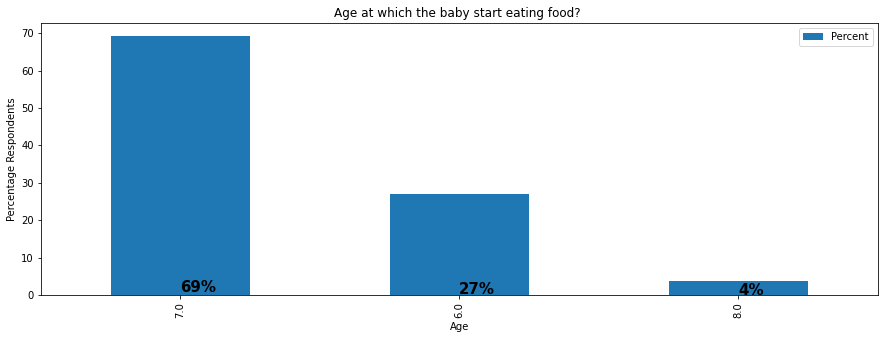

In [66]:
eating_df = df['7. From what age should the baby start eating food?'].value_counts(normalize =True)

eating_df = eating_df.mul(100).rename('Percent').reset_index()


# ax = eating_df.plot.bar(rot=0, figsize=(8, 7))
ax = eating_df.plot.bar(x = 'index', y = 'Percent', figsize = (15,5))
# set the title
plt.title('Age at which the baby start eating food? ')
plt.text(0.5,0.5, "", weight = "bold")
ax.set_xlabel("Age")
ax.set_ylabel("Percentage Respondents")

for p in ax.patches:
    width = p.get_width()
    height = (p.get_height()/100)
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='left', weight = "bold", va = 'baseline', size = 15)

In [67]:
df['8. For how long should the baby continue to receive complementary breast feeding?'].value_counts()

Until 24 months (2years) or more    26
Name: 8. For how long should the baby continue to receive complementary breast feeding?, dtype: int64

In [68]:
df['9. How likely are you to breastfeed your baby when you get one?'].value_counts()

Very likely    26
Name: 9. How likely are you to breastfeed your baby when you get one?, dtype: int64

In [69]:
df['12. Do you treat your water in any way to make it safe for drinking?'].value_counts()

Yes    24
No      2
Name: 12. Do you treat your water in any way to make it safe for drinking?, dtype: int64

In [70]:
df['13. If yes, what do you usually do to the water to make it safer for drinking?'].value_counts()

Add bleach/ chlorine                      9
Other                                     5
Let it stand and settle/ sedimentation    3
Boil                                      3
Don’t know                                2
Add bleach/ chlorine Boil                 2
Name: 13. If yes, what do you usually do to the water to make it safer for drinking?, dtype: int64

In [71]:
df['13. If yes, what do you usually do to the water to make it safer for drinking?/Other'].value_counts()

0.0    19
1.0     5
Name: 13. If yes, what do you usually do to the water to make it safer for drinking?/Other, dtype: int64

In [72]:
df['13. If yes, what do you usually do to the water to make it safer for drinking?/Strain it through cloth'].value_counts()

0.0    24
Name: 13. If yes, what do you usually do to the water to make it safer for drinking?/Strain it through cloth, dtype: int64

In [73]:
df['13. If yes, what do you usually do to the water to make it safer for drinking?/Add bleach/ chlorine'].value_counts()

0.0    13
1.0    11
Name: 13. If yes, what do you usually do to the water to make it safer for drinking?/Add bleach/ chlorine, dtype: int64

In [74]:
df['13. If yes, what do you usually do to the water to make it safer for drinking?/Don’t know'].value_counts()

0.0    22
1.0     2
Name: 13. If yes, what do you usually do to the water to make it safer for drinking?/Don’t know, dtype: int64

In [75]:
df['13. If yes, what do you usually do to the water to make it safer for drinking?/Let it stand and settle/ sedimentation'].value_counts()

0.0    21
1.0     3
Name: 13. If yes, what do you usually do to the water to make it safer for drinking?/Let it stand and settle/ sedimentation, dtype: int64

In [76]:
df['13. If yes, what do you usually do to the water to make it safer for drinking?/Water filter (ceramic, sand, composite)'].value_counts()

0.0    24
Name: 13. If yes, what do you usually do to the water to make it safer for drinking?/Water filter (ceramic, sand, composite), dtype: int64

In [77]:
df['13. If yes, what do you usually do to the water to make it safer for drinking?/solar disinfection'].value_counts()

0.0    24
Name: 13. If yes, what do you usually do to the water to make it safer for drinking?/solar disinfection, dtype: int64

In [78]:
water_1 = df[(df['13. If yes, what do you usually do to the water to make it safer for drinking?/Other'] == 1)]
water_2 = df[(df['13. If yes, what do you usually do to the water to make it safer for drinking?/Strain it through cloth'] == 1)]
water_3 = df[(df['13. If yes, what do you usually do to the water to make it safer for drinking?/Add bleach/ chlorine'] == 1)]
water_4 = df[(df['13. If yes, what do you usually do to the water to make it safer for drinking?/Don’t know']  == 1)]
water_5 = df[(df['13. If yes, what do you usually do to the water to make it safer for drinking?/Let it stand and settle/ sedimentation']  == 1)]
water_6 = df[(df['13. If yes, what do you usually do to the water to make it safer for drinking?/Water filter (ceramic, sand, composite)']  == 1)]
water_7 = df[(df['13. If yes, what do you usually do to the water to make it safer for drinking?/solar disinfection']  == 1)]



In [79]:
water_dict = pd.DataFrame({'Other': [water_1 ['13. If yes, what do you usually do to the water to make it safer for drinking?/Other'].count()], 
'Strain it through cloth': [water_2['13. If yes, what do you usually do to the water to make it safer for drinking?/Strain it through cloth'].count()], 
'chlorine': [water_3['13. If yes, what do you usually do to the water to make it safer for drinking?/Add bleach/ chlorine'].count()], 
'Don’t know': [water_4['13. If yes, what do you usually do to the water to make it safer for drinking?/Don’t know'].count()], 
'Water filter (ceramic, sand, composite)': [water_6['13. If yes, what do you usually do to the water to make it safer for drinking?/Water filter (ceramic, sand, composite)'].count()],
 'solar disinfection': [water_7['13. If yes, what do you usually do to the water to make it safer for drinking?/solar disinfection'].count()], 
 'Let it stand and settle/ sedimentation': [water_5['13. If yes, what do you usually do to the water to make it safer for drinking?/Let it stand and settle/ sedimentation'].count()]}, index=[0])


In [80]:
water_dict.head()

,Other,Strain it through cloth,chlorine,Don’t know,"Water filter (ceramic, sand, composite)",solar disinfection,Let it stand and settle/ sedimentation
0,5,0,11,2,0,0,3


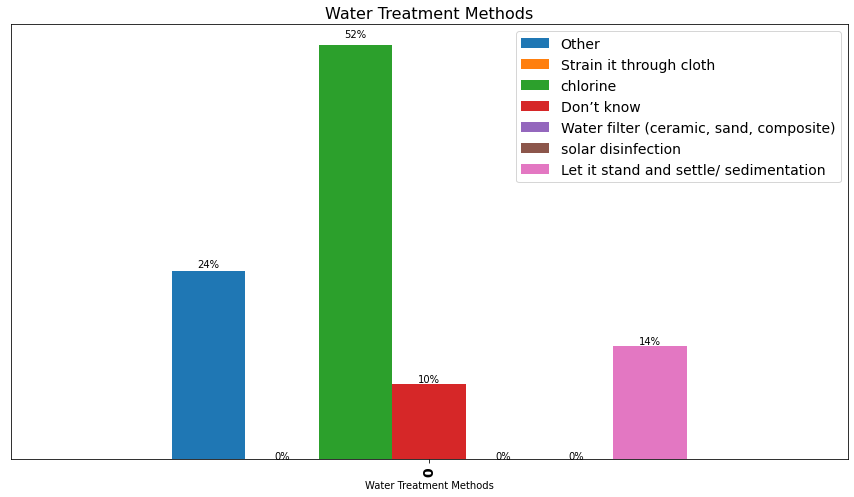

In [81]:

colors_list = ['#5cb85c','#5bc0de','#d9534f','#40E0D0','#008000']

# Normalize result
result_pct = water_dict.div(water_dict.sum(1), axis=0)

ax = result_pct.plot(kind='bar',figsize=(15,8),width = 0.8,edgecolor=None)
ax.set_xlabel("Water Treatment Methods")
plt.legend(labels=water_dict.columns,fontsize= 14)
plt.title("Water Treatment Methods",fontsize= 16)

plt.xticks(fontsize=14, weight = "bold")
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:0.00%}', (x + width/2.00, y + height*1.020), ha='center')


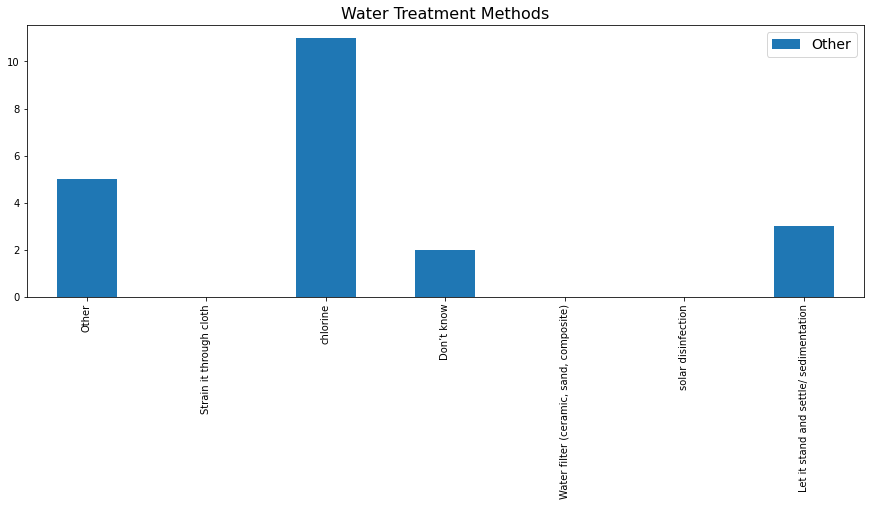

In [82]:
# loop over all columns
for col in water_dict.columns:
    # counting occurences for each value can be done by value_counts()
    val_counts = water_dict[col]

    # calculate the sum of all categories
    total = val_counts.sum()
    # use value count for each category and divide it by the total count of all categories
    # and multiply by 100 to get nice percent values
    df2[col] = val_counts / total * 100

# columns and rows need to be transposed in order to get the result we want  
water_dict.transpose().plot.bar(figsize=(15,5))
# ax = result_pct.plot(kind='bar',figsize=(15,8),width = 0.8,edgecolor=None)
# ax.set_xlabel("Water Treatment Methods")
plt.legend(labels=water_dict.columns,fontsize= 14)
plt.title("Water Treatment Methods",fontsize= 16)
plt.show()

Text(0, 0.5, 'Frequency of Use')

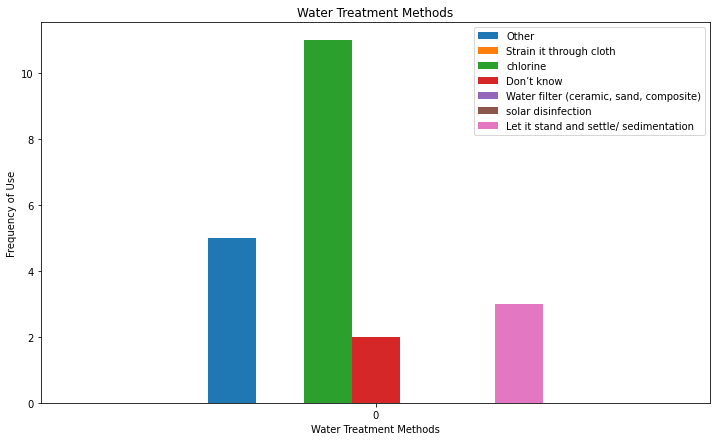

In [83]:
ax = water_dict.plot.bar(rot=0, figsize=(12, 7))
# set the title
plt.title('Water Treatment Methods')
ax.set_xlabel("Water Treatment Methods")
ax.set_ylabel("Frequency of Use")

In [84]:
df3['33. Think about yesterday when your child woke up in the morning until it went to bed. Was she/he fed with anything other than Breastmilk?'].value_counts()

Yes    89
No     47
Name: 33. Think about yesterday when your child woke up in the morning until it went to bed. Was she/he fed with anything other than Breastmilk?, dtype: int64

#### Child Eat Plot

In [85]:
df3['35. a) Think about when your child first woke up yesterday. Did your child eat anything at the time? If yes: please tell me everything your child ate at that time.'].unique()

array([99, 'Baby porridge\n', 'Porridge ', 'Porridge',
       'Cooked porriadge ',
       'The child took cooked porriadge in the morning ',
       'Cooked porriadge in the morning.',
       'Cooked porriadge in the morning, afternoon and evening',
       'Breast milk alone.', 'Porridge,',
       'Porridge, plain water and Sima ', 'Porridge, Plain water, stew',
       'Porridge, Plain water,', 'Porridge,Plain water', 'Porridge, ',
       'Plain water', 'Porridge,Tablets ',
       'Porridge,Ugali and Mashed potatoes', 'Poridge,water ',
       'Poridge.. morning,\nUgali and soup', 'Tea,Maandazi.Poridge.',
       'Tea Morning,Ugali& Mchicha, Ugali and mboga evening',
       'Tea, Poridge, Ugali', 'Poridge.morning to evening',
       'Poridge,Cow milk, Ugali and soup',
       'Poridge, Ugali & Beans , Ugali and greens',
       'Tea &Mandazi, Ugali &Beans ,Ugali and Omena',
       'Porriadge\nMilk tea', 'Porriadge\n2 bananas', 'Porriadge\nMilk',
       'Yes:  tea with mahamri, sima with fis

Counselling Services Plot

In [86]:
df3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?'].unique()

array(['Birth preparedness Breastfeeding Nutrition during pregnancy',
       'Family planning Self-care during pregnancy',
       'Self-care during pregnancy Nutrition during pregnancy',
       'Nutrition during pregnancy Family planning Self-care during pregnancy',
       'Birth preparedness Nutrition during pregnancy', 'Breastfeeding',
       'Birth preparedness',
       'Birth preparedness Breastfeeding Family planning',
       'Breastfeeding Family planning',
       'Breastfeeding Rest during pregnancy Self-care during pregnancy Nutrition during pregnancy',
       'Birth preparedness Danger signs during delivery Danger signs for the new-born Rest during pregnancy Self-care during pregnancy Danger signs during pregnancy Family planning Breastfeeding Nutrition during pregnancy',
       'Danger signs during pregnancy Nutrition during pregnancy Rest during pregnancy Self-care during pregnancy Family planning Birth preparedness Danger signs during delivery Danger signs for the new-born 

In [106]:
counselling_1 = df3[(df3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs during pregnancy'] != 99) & (df3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs during pregnancy'] != 0)]
counselling_2 = df3[(df3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Nutrition during pregnancy'] != 99) & (df3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Nutrition during pregnancy'] != 0)]
counselling_3 = df3[(df3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Self-care during pregnancy'] != 99) & (df3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Self-care during pregnancy'] != 0)]
counselling_4 = df3[(df3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Birth preparedness']  != 99) & (df3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Birth preparedness']  != 0)]
counselling_5 = df3[(df3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Family planning'] != 99) & (df3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Family planning'] != 0)]

counselling_6 = df3[(df3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs during delivery'] != 99) & (df3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs during delivery'] != 0)]

counselling_7 = df3[(df3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Post-partum danger signs for the mother'] != 99) & (df3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Post-partum danger signs for the mother'] != 0)]

counselling_8 = df3[(df3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs for the new-born']  != 99) & (df3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs for the new-born']  != 0)]


counselling_9 = df3[(df3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Rest during pregnancy']  != 99) & (df3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Rest during pregnancy']  != 0)]

counselling_10 = df3[(df3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Breastfeeding']  != 99) & (df3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Breastfeeding']  != 0)]


In [146]:
counselling_dict = pd.DataFrame({'Danger signs during pregnancy': [counselling_1 ['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs during pregnancy'].count()], 
'Nutrition During Pregnancy': [counselling_2['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Nutrition during pregnancy'].count()], 
'Self-care': [counselling_3['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Self-care during pregnancy'].count()], 

'Rest During Pregnancy': [counselling_9['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Rest during pregnancy'].count()], 

'Danger signs during delivery': [counselling_6['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs during delivery'].count()],

'Post-partum danger signs for the mother': [counselling_7['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Post-partum danger signs for the mother'].count()], 

'Birth Preparedness': [counselling_4['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Birth preparedness'].count()],

'Breastfeeding': [counselling_10['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Breastfeeding'].count()],  

# 'Danger signs during delivery': [counselling_6['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs during delivery'].count()],

'Danger signs for the new-born': [counselling_8['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs for the new-born'].count()], 

'Family Planning': [counselling_5['5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Family planning'].count()]}, index=[0])


In [147]:
counselling_dict.head()

,Danger signs during pregnancy,Nutrition During Pregnancy,Self-care,Rest During Pregnancy,Danger signs during delivery,Post-partum danger signs for the mother,Birth Preparedness,Breastfeeding,Danger signs for the new-born,Family Planning
0,94,118,110,110,80,51,101,112,67,80


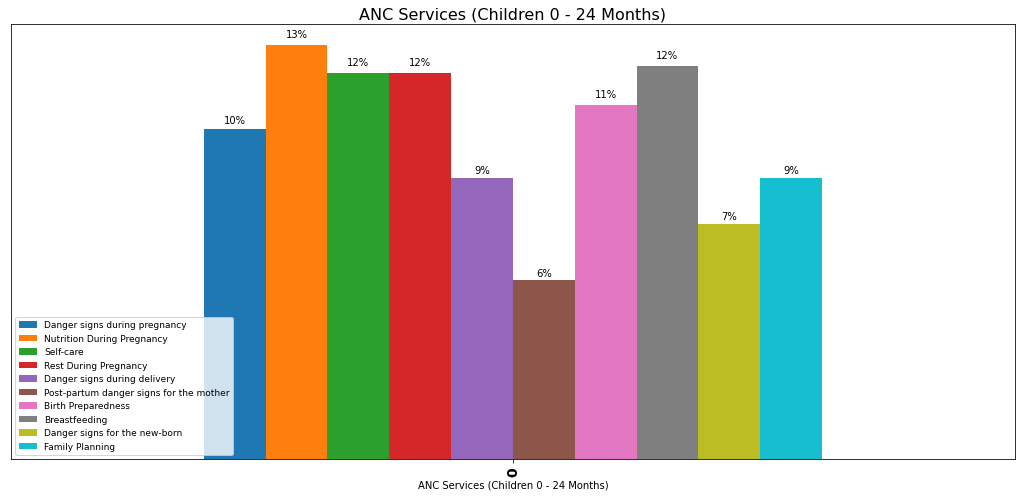

In [169]:

colors_list = ['#5cb85c','#5bc0de','#d9534f','#40E0D0','#008000']

# Normalize result
result_pct = counselling_dict.div(counselling_dict.sum(1), axis=0)

ax = result_pct.plot(kind='bar',figsize=(18,8),width = 0.8,edgecolor=None)
ax.set_xlabel("ANC Services (Children 0 - 24 Months)")
plt.legend(labels=counselling_dict.columns,fontsize=9, loc="lower left")
plt.title("ANC Services (Children 0 - 24 Months)",fontsize= 16)

plt.xticks(fontsize=14, weight = "bold")
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:0.00%}', (x + width/2.00, y + height*1.020), ha='center')


Services given to the Women

In [145]:
services_1 = df3[(df3['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Check your blood pressure'] != 99) & (df3['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Check your blood pressure'] != 0)]
services_2 = df3[(df3['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Perform an abdominal examination'] != 99) & (df3['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Perform an abdominal examination'] != 0)]
services_3 = df3[(df3['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Listen to the baby’s heartbeat'] != 99) & (df3['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Listen to the baby’s heartbeat'] != 0)]
services_4 = df3[(df3['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Ask about your medical history']  != 99) & (df3['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Ask about your medical history']  != 0)]

services_5 = df3[(df3['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Take a urine sample'] != 99) & (df3['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Take a urine sample'] != 0)]

services_6 = df3[(df3['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Give you advice on what to do if you have a problem'] != 99) & (df3['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Give you advice on what to do if you have a problem'] != 0)]

services_7 = df3[(df3['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Give an injection(s) for tetanus'] != 99) & (df3['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Give an injection(s) for tetanus'] != 0)]

services_8 = df3[(df3['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Give you malaria medicine']  != 99) & (df3['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Give you malaria medicine']  != 0)]


services_9 = df3[(df3['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Ask you to take / conduct a syphilis test']  != 99) & (df3['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Ask you to take / conduct a syphilis test']  != 0)]

services_10 = df3[(df3['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Ask you to take / conduct an HIV test']  != 99) & (df3['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Ask you to take / conduct an HIV test']  != 0)]


In [149]:
services_dict = pd.DataFrame({'Check your blood pressure': [services_1 ['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Check your blood pressure'].count()], 

'Perform an abdominal examination': [services_2['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Perform an abdominal examination'].count()], 

'Listen to the baby’s heartbeat': [services_3['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Listen to the baby’s heartbeat'].count()], 

'Ask you to take / conduct a syphilis test': [services_9['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Ask you to take / conduct a syphilis test'].count()], 

'Give you advice on what to do if you have a problem': [services_6['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Give you advice on what to do if you have a problem'].count()],

'Give an injection(s) for tetanus': [services_7['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Give an injection(s) for tetanus'].count()], 

'Ask about your medical history': [services_4['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Ask about your medical history'].count()],

'Ask you to take / conduct an HIV test': [services_10['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Ask you to take / conduct an HIV test'].count()],  

# 'Danger signs during delivery': [services_6['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Danger signs during delivery'].count()],

'Give you malaria medicine': [services_8['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Give you malaria medicine'].count()], 

'Take a urine sample': [services_5['6. During your last antenatal care visit,  before delivering  this baby , did someone;/Take a urine sample'].count()]}, index=[0])


In [150]:
services_dict.head()

,Check your blood pressure,Perform an abdominal examination,Listen to the baby’s heartbeat,Ask you to take / conduct a syphilis test,Give you advice on what to do if you have a problem,Give an injection(s) for tetanus,Ask about your medical history,Ask you to take / conduct an HIV test,Give you malaria medicine,Take a urine sample
0,133,86,127,50,76,81,81,120,99,123


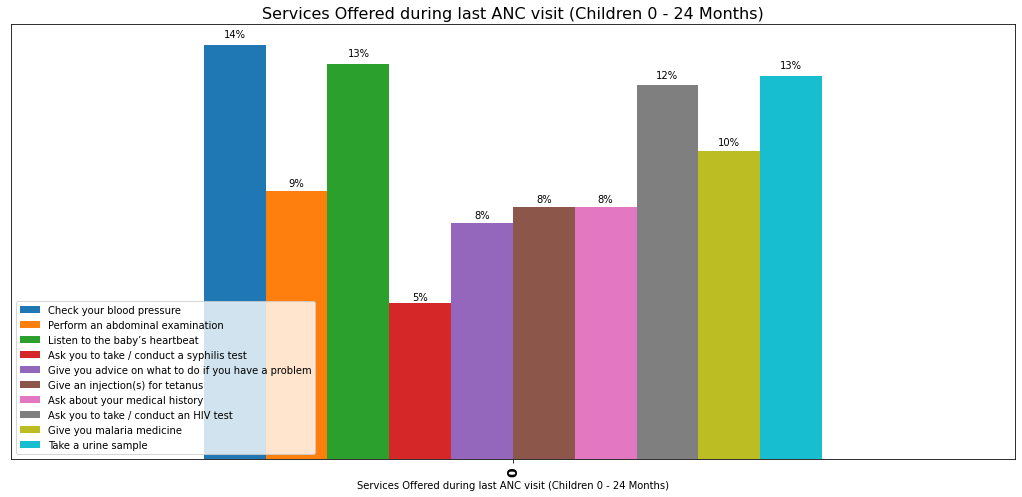

In [172]:

colors_list = ['#5cb85c','#5bc0de','#d9534f','#40E0D0','#008000']

# Normalize result
result_pct = services_dict.div(services_dict.sum(1), axis=0)

ax = result_pct.plot(kind='bar',figsize=(18,8),width = 0.8,edgecolor=None)
ax.set_xlabel("Services Offered during last ANC visit (Children 0 - 24 Months)")
plt.legend(labels=services_dict.columns,fontsize=10, loc="lower left")
plt.title("Services Offered during last ANC visit (Children 0 - 24 Months)",fontsize= 16)

plt.xticks(fontsize=14, weight = "bold")
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:0.00%}', (x + width/2.00, y + height*1.020), ha='center')


Immunization: Verification Methods on ....

In [154]:
df3['14. May I have the card, booklet for your child clinic./BCG vaccination against tuberculosis'].value_counts()

1    133
0      3
Name: 14. May I have the card, booklet for your child clinic./BCG vaccination against tuberculosis, dtype: int64

In [155]:
immune_1 = df3[(df3['14. May I have the card, booklet for your child clinic./BCG vaccination against tuberculosis'] != 99) & (df3['14. May I have the card, booklet for your child clinic./BCG vaccination against tuberculosis'] != 0)]
immune_2 = df3[(df3['14. May I have the card, booklet for your child clinic./Oral Polio vaccine'] != 99) & (df3['14. May I have the card, booklet for your child clinic./Oral Polio vaccine'] != 0)]
immune_3 = df3[(df3['14. May I have the card, booklet for your child clinic./Pentavalent vaccine, that is, an injection given in the thigh'] != 99) & (df3['14. May I have the card, booklet for your child clinic./Pentavalent vaccine, that is, an injection given in the thigh'] != 0)]
immune_4 = df3[(df3['14. May I have the card, booklet for your child clinic./Rotavirus vaccine']  != 99) & (df3['14. May I have the card, booklet for your child clinic./Rotavirus vaccine']  != 0)]

immune_5 = df3[(df3['14. May I have the card, booklet for your child clinic./A measles injection in the arm'] != 99) & (df3['14. May I have the card, booklet for your child clinic./A measles injection in the arm'] != 0)]

immune_6 = df3[(df3['14. May I have the card, booklet for your child clinic./All doses were given by 12 months?'] != 99) & (df3['14. May I have the card, booklet for your child clinic./All doses were given by 12 months?'] != 0)]

immune_7 = df3[(df3['14. May I have the card, booklet for your child clinic./Vitamin A supplements ( for children above 6 months)'] != 99) & (df3['14. May I have the card, booklet for your child clinic./Vitamin A supplements ( for children above 6 months)'] != 0)]


In [158]:
df3['14. May I have the card, booklet for your child clinic./BCG vaccination against tuberculosis'].value_counts()

1    133
0      3
Name: 14. May I have the card, booklet for your child clinic./BCG vaccination against tuberculosis, dtype: int64

In [159]:
immune_dict = pd.DataFrame({'BCG vaccination against tuberculosis': [immune_1 ['14. May I have the card, booklet for your child clinic./BCG vaccination against tuberculosis'].count()], 

'Oral Polio vaccine': [immune_2['14. May I have the card, booklet for your child clinic./Oral Polio vaccine'].count()], 

'Pentavalent vaccine, that is, an injection given in the thigh': [immune_3['14. May I have the card, booklet for your child clinic./Pentavalent vaccine, that is, an injection given in the thigh'].count()], 

'All doses were given by 12 months?': [immune_6['14. May I have the card, booklet for your child clinic./All doses were given by 12 months?'].count()],

'Vitamin A supplements ( for children above 6 months)': [immune_7['14. May I have the card, booklet for your child clinic./Vitamin A supplements ( for children above 6 months)'].count()], 

'Rotavirus vaccine': [immune_4['14. May I have the card, booklet for your child clinic./Rotavirus vaccine'].count()],

'A measles injection in the arm': [immune_5['14. May I have the card, booklet for your child clinic./A measles injection in the arm'].count()]}, index=[0])


In [160]:
immune_dict.head()

,BCG vaccination against tuberculosis,Oral Polio vaccine,"Pentavalent vaccine, that is, an injection given in the thigh",All doses were given by 12 months?,Vitamin A supplements ( for children above 6 months),Rotavirus vaccine,A measles injection in the arm
0,133,86,127,76,81,81,123


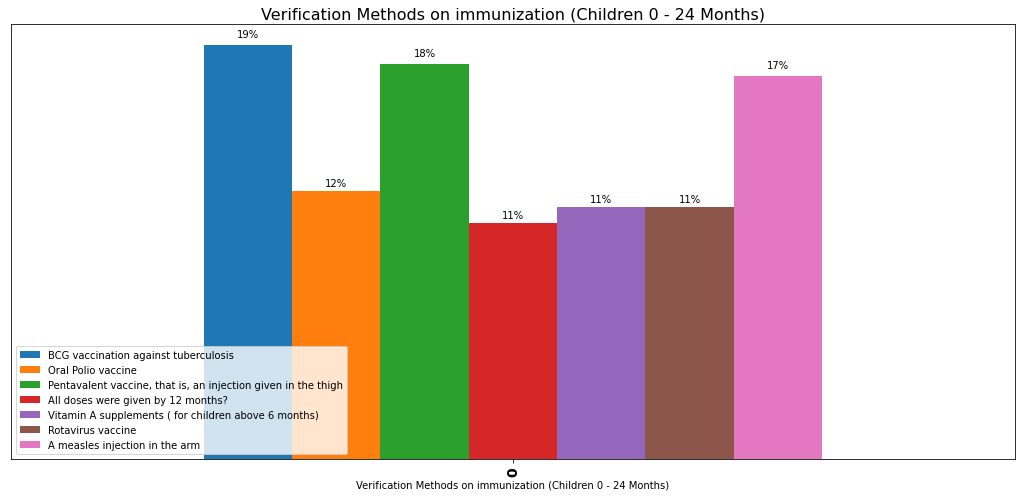

In [171]:

colors_list = ['#5cb85c','#5bc0de','#d9534f','#40E0D0','#008000']

# Normalize result
result_pct = immune_dict.div(immune_dict.sum(1), axis=0)

ax = result_pct.plot(kind='bar',figsize=(18,8),width = 0.8,edgecolor=None)
ax.set_xlabel("Verification Methods on immunization (Children 0 - 24 Months)")
plt.legend(labels=immune_dict.columns,fontsize=10, loc="lower left")
plt.title("Verification Methods on immunization (Children 0 - 24 Months)",fontsize= 16)

plt.xticks(fontsize=14, weight = "bold")
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:0.00%}', (x + width/2.00, y + height*1.020), ha='center')


Age at which baby starts eating food

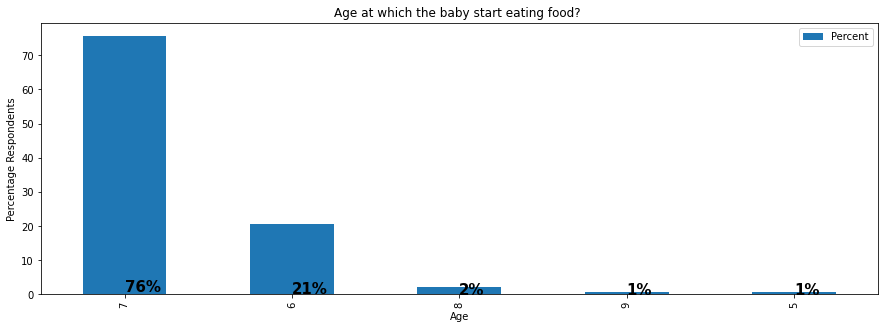

In [175]:
eating1_df = df3['26. From what age should the baby start eating food?'].value_counts(normalize =True)

eating1_df = eating1_df.mul(100).rename('Percent').reset_index()


# ax = eating1_df.plot.bar(rot=0, figsize=(8, 7))
ax = eating1_df.plot.bar(x = 'index', y = 'Percent', figsize = (15,5))
# set the title
plt.title('Age at which the baby start eating food? ')
plt.text(0.5,0.5, "", weight = "bold")
ax.set_xlabel("Age")
ax.set_ylabel("Percentage Respondents")

for p in ax.patches:
    width = p.get_width()
    height = (p.get_height()/100)
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='left', weight = "bold", va = 'baseline', size = 15)

In [173]:
df3['26. From what age should the baby start eating food?'].value_counts()

7    103
6     28
8      3
9      1
5      1
Name: 26. From what age should the baby start eating food?, dtype: int64

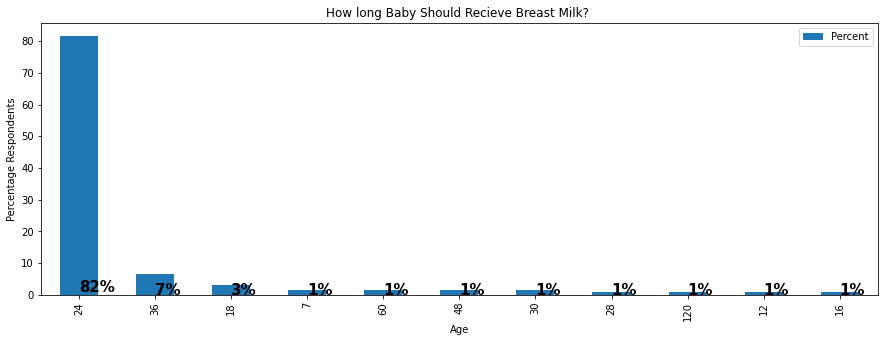

In [176]:
milk_df = df3['27. How long should the baby continue to receive breast milk?'].value_counts(normalize =True)

milk_df = milk_df.mul(100).rename('Percent').reset_index()


# ax = milk_df.plot.bar(rot=0, figsize=(8, 7))
ax = milk_df.plot.bar(x = 'index', y = 'Percent', figsize = (15,5))
# set the title
plt.title('How long Baby Should Recieve Breast Milk? ')
plt.text(0.5,0.5, "", weight = "bold")
ax.set_xlabel("Age")
ax.set_ylabel("Percentage Respondents")

for p in ax.patches:
    width = p.get_width()
    height = (p.get_height()/100)
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='left', weight = "bold", va = 'baseline', size = 15)

In [174]:
df3['27. How long should the baby continue to receive breast milk?'].value_counts()

24     111
36       9
18       4
7        2
60       2
48       2
30       2
28       1
120      1
12       1
16       1
Name: 27. How long should the baby continue to receive breast milk?, dtype: int64

complimentary feeding

In [177]:
df3['33. Think about yesterday when your child woke up in the morning until it went to bed. Was she/he fed with anything other than Breastmilk?'].value_counts()

Yes    89
No     47
Name: 33. Think about yesterday when your child woke up in the morning until it went to bed. Was she/he fed with anything other than Breastmilk?, dtype: int64

In [90]:
df3.head(1)

,start,end,i. Date,ii. Enumerator's name,iii. Beneficiary's resident Sub Location,iv. Beneficiary's resident Village,v. Household size: How many people are in your household?,"vi. Of the above, how many children are;",vi. (a).2-5 years ?,vi. (b). 7 - 24 Months?,vi. (c). 0 - 6 Months?,vii. Category of the Beneficiary,A. How old are you?,B. Highest level of school you attended?,C. How old is your youngest child?,"Baby's Gender(1=Boy, 2= Girl).",1. Did you seek antenatal care while carrying your most recent pregnancy?,"2. If Yes, please tell where you sort services from",3. At what Gestation were you when you went for your 1st ANC visit?,4. How many ANC Visits did you attend during this pregnancy?,"5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs during pregnancy","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Nutrition during pregnancy","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Rest during pregnancy","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Self-care during pregnancy","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Birth preparedness","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Family planning","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs during delivery","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Post-partum danger signs for the mother","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs for the new-born","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Breastfeeding","6. During your last antenatal care visit, before delivering this baby , did someone;","6. During your last antenatal care visit, before delivering this baby , did someone;/Check your blood pressure","6. During your last antenatal care visit, before delivering this baby , did someone;/Perform an abdominal examination","6. During your last antenatal care visit, before delivering this baby , did someone;/Listen to the baby’s heartbeat","6. During your last antenatal care visit, before delivering this baby , did someone;/Ask about your medical history","6. During your last antenatal care visit, before delivering this baby , did someone;/Take a urine sample","6. During your last antenatal care visit, before delivering this baby , did someone;/Give you advice on what to do if you have a problem","6. During your last antenatal care visit, before delivering this baby , did someone;/Give an injection(s) for tetanus","6. During your last antenatal care visit, before delivering this baby , did someone;/Give you malaria medicine","6. During your last antenatal care visit, before delivering this baby , did someone;/Ask you to take / conduct a syphilis test","6. During your last antenatal care visit, before delivering this baby , did someone;/Ask you to take / conduct an HIV test",7. What were the reasons that you did not see someone for antenatal care?,7. What were the reasons that you did not see someone for antenatal care?/No health care provider available,7. What were the reasons that you did not see someone for antenatal care?/Could not afford,7. What were the reasons that you did not see someone for antenatal care

Pregnant Women

In [178]:
df2['A. Age: How old are you'].value_counts()

18 – 29       20
30 – 49        5
50 & above     1
Name: A. Age: How old are you, dtype: int64

In [182]:
df2['C.  PREGNANCY: Is this your first pregnancy?'].value_counts()

No     19
Yes     7
Name: C.  PREGNANCY: Is this your first pregnancy?, dtype: int64

In [186]:
df2['D. If it is not the  first pregnancy, How many children do you have?'].value_counts()

1.0    4
6.0    4
4.0    3
2.0    3
3.0    3
8.0    1
5.0    1
Name: D. If it is not the  first pregnancy, How many children do you have?, dtype: int64

In [181]:
df2['B.  Educational level: what is the highest level of school you attended?'].value_counts()

upper primary (4-7)          18
No formal schooling           5
ordinary secondary ( 1-4)     3
Name: B.  Educational level: what is the highest level of school you attended?, dtype: int64

In [187]:
df2['1. Have you ever breastfed a child?'].value_counts()

Yes    19
Name: 1. Have you ever breastfed a child?, dtype: int64

In [188]:
df2['2. What is the first food a new-born baby should receive?'].value_counts()

Only breast Milk    26
Name: 2. What is the first food a new-born baby should receive?, dtype: int64

In [189]:
df2['3. Have you ever heard of exclusive breastfeeding?'].value_counts()

Yes    25
No      1
Name: 3. Have you ever heard of exclusive breastfeeding?, dtype: int64

In [190]:
df2['4. What does exclusive breastfeeding mean?'].value_counts()

means that the infant gets only breast milk and no other liquids or foods    24
99                                                                            1
Don’t know                                                                    1
Name: 4. What does exclusive breastfeeding mean?, dtype: int64

In [92]:
df2.head(1)

,start,end,i. Date,ii. Enumerator's name,iii. Beneficiary's resident Sub Location,iv. Beneficiary's resident Village,v. Household size: How many people are in your household?,"vi. Of the above, how many children are;",vi. (a).2-5 years ?,vi. (b). 7 - 24 Months?,vi. (c). 0 - 6 Months?,vii. Category of the Beneficiary,A. Age: How old are you,B. Educational level: what is the highest level of school you attended?,C. PREGNANCY: Is this your first pregnancy?,"D. If it is not the first pregnancy, How many children do you have?",1. Have you ever breastfed a child?,2. What is the first food a new-born baby should receive?,3. Have you ever heard of exclusive breastfeeding?,4. What does exclusive breastfeeding mean?,5. How long should the baby be fed with breast milk only?,6. Why do you think breast milk is the only food Recommended for infants up to six months old?,6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Because breast milk provides all nutrients and liquids a baby needs in its first six months.,6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Because babies cannot digest other foods before they are six months old,6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Other,6. Why do you think breast milk is the only food Recommended for infants up to six months old?/Don’t know,7. From what age should the baby start eating food?,8. For how long should the baby continue to receive complementary breast feeding?,9. How likely are you to breastfeed your baby when you get one?,10. Can you tell me the reason why you are unlikely to breastfeed your baby?,10. Can you tell me the reason why you are unlikely to breastfeed your baby?/Side effects/ health concerns,10. Can you tell me the reason why you are unlikely to breastfeed your baby?/Lack of access/ too far,10. Can you tell me the reason why you are unlikely to breastfeed your baby?/Costs too much,10. Can you tell me the reason why you are unlikely to breastfeed your baby?/preferred method not available,10. Can you tell me the reason why you are unlikely to breastfeed your baby?/Inconvenient to use,10. Can you tell me the reason why you are unlikely to breastfeed your baby?/Interferes with body’s normal process,"10. Can you tell me the reason why you are unlikely to breastfeed your baby?/Others (mother in law, mother, and friends) do not approve",10. Can you tell me the reason why you are unlikely to breastfeed your baby?/Other (specify),Other (specify),11. What is your primary source of water,"Other, Please specify here",12. Do you treat your water in any way to make it safe for drinking?,"13. If yes, what do you usually do to the water to make it safer for drinking?","13. If yes, what do you usually do to the water to make it safer for drinking?/Let it stand and settle/ sedimentation","13. If yes, what do you usually do to the water to make it safer for drinking?/Strain it through cloth","13. If yes, what do you usually do to the water to make it safer for drinking?/Boil","13. If yes, what do you usually do to the water to make it safer for drinking?/Add bleach/ chlorine","13. If yes, what do you usually do to the water to make it safer for drinking?/Water filter (ceramic, sand, composite)","13. If yes, what do you usually do to the water to make it safer for drinking?/solar disinfection","13. If yes, what do you usually do to the water to make it safer for drinking?/Don’t know","13. If yes, what do you usually do to the water to make it safer for drinking?/Other",Others Specify here,14. What kind of toilet facility do members of your household usually use?,14. What kind of toilet facility do members of your household usually use?/Pit latrine,14. What kind of toilet facility do members of your household usually use?/VIP latrine,14. What kind of toilet facility do members of your household usually use?/Flush toilet,14. What kind of toilet facility do m

In [ ]:
df2[]